# 卷积神经网络
---

> 李煜

numpy 实现卷积计算 

In [1]:

import numpy as np

# 输入矩阵
input_matrix =np.array( [[1, 2, 1, 2],
                [2, 1, 2, 1],
                [1, 2, 1, 2],
                [2, 1, 2, 1]])

# 卷积核
kernel_matrix = np.array( [[1, 0],
                 [0, 1]])

# 步长
stride = 2

# 输出矩阵
output_matrix = np.zeros((2, 2))

# 卷积计算
for i in range(0, 4, stride):
    for j in range(0, 4, stride):
        output_matrix[int(i / stride), int(j / stride)] = (input_matrix[i:i+2, j:j+2] * kernel_matrix).sum()

print(output_matrix)

[[2. 2.]
 [2. 2.]]


Pytorch 实现卷积计算

In [2]:
# PyTorch code for a convolution operation

import torch

# 输入矩阵
input_matrix = torch.Tensor([[1, 2, 1, 2],
                              [2, 1, 2, 1],
                              [1, 2, 1, 2],
                              [2, 1, 2, 1]])

# 卷积核
kernel_matrix = torch.Tensor([[1, 0],
                              [0, 1]])

# 步长
stride = 2

# 输出矩阵
output_matrix = torch.zeros((2, 2))

# 卷积计算
for i in range(0, 4, stride):
    for j in range(0, 4, stride):
        output_matrix[int(i / stride), int(j / stride)] = (input_matrix[i:i+2, j:j+2] * kernel_matrix).sum()

print(output_matrix)

tensor([[2., 2.],
        [2., 2.]])


卷积层

In [3]:
from torch import nn
#相关解释在word中

def corr2d(X, K):
    """Compute 2D cross-correlation.

    Defined in :numref:`sec_conv_layer`"""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))
    
    def forward(self, x):
        return corr2d(x, self.weight) + self.bias


## 填充和步幅
> 李俊标

In [4]:
import torch
from torch import nn
import numpy as np

# 为了方便起见，我们定义了一个计算卷积层的函数。
# 此函数初始化卷积层权重，并对输入和输出提高和缩减相应的维数
def comp_conv2d(conv2d, X):
    # 这里的（1，1）表示批量大小和通道数都是1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # 省略前两个维度：批量大小和通道
    return Y.reshape(Y.shape[2:])

# 请注意，这里每边都填充了1行或1列，因此总共添加了2行或2列
conv2d = nn.Conv2d(1, 1, kernel_size=2, padding=1, bias=False)
conv2d.weight = nn.Parameter(torch.Tensor([range(4)]).view((1, 1, 2, 2)))
X = torch.Tensor([range(9)]).view((3, 3))
Y = comp_conv2d(conv2d, X)
print(f"Input: {X}, \nshape: {tuple(X.shape)}\n---")
print(f"Kernal: {torch.Tensor(conv2d.weight)}, \nshape: {tuple(conv2d.weight[0][0].shape)}\n---")
print(f"Output: {Y}, \nshape: {tuple(Y.shape)}\n---")

Input: tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]]), 
shape: (3, 3)
---
Kernal: tensor([[[[0., 1.],
          [2., 3.]]]], grad_fn=<AliasBackward0>), 
shape: (2, 2)
---
Output: tensor([[ 0.,  3.,  8.,  4.],
        [ 9., 19., 25., 10.],
        [21., 37., 43., 16.],
        [ 6.,  7.,  8.,  0.]], grad_fn=<ReshapeAliasBackward0>), 
shape: (4, 4)
---


## 多输入多输出通道
> 李俊标

In [5]:
import torch

def corr2d(X, K):
    """Compute 2D cross-correlation.

    Defined in :numref:`sec_conv_layer`"""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

def corr2d_multi_in(X, K):
    # 先遍历“X”和“K”的第0个维度（通道维度），再把它们加在一起
    return sum(corr2d(x, k) for x, k in zip(X, K))

X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

Y = corr2d_multi_in(X, K)
print(f"Input: {X}, \nshape: {tuple(X.shape)}\n---")
print(f"Kernal: {K}, \nshape: {tuple(K.shape)}\n---")
print(f"Output: {Y}, \nshape: {tuple(Y.shape)}\n---")

Input: tensor([[[0., 1., 2.],
         [3., 4., 5.],
         [6., 7., 8.]],

        [[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]]), 
shape: (2, 3, 3)
---
Kernal: tensor([[[0., 1.],
         [2., 3.]],

        [[1., 2.],
         [3., 4.]]]), 
shape: (2, 2, 2)
---
Output: tensor([[ 56.,  72.],
        [104., 120.]]), 
shape: (2, 2)
---


In [6]:
def corr2d_multi_in_out(X, K):
    # 迭代“K”的第0个维度，每次都对输入“X”执行互相关运算。
    # 最后将所有结果都叠加在一起
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

K = torch.stack((K, K + 1, K + 2), 0)
Y = corr2d_multi_in_out(X, K)

print(f"Input: {X}, \nshape: {tuple(X.shape)}\n---")
print(f"Kernal: {K}, \nshape: {tuple(K.shape)}\n---")
print(f"Output: {Y}, \nshape: {tuple(Y.shape)}\n---")

Input: tensor([[[0., 1., 2.],
         [3., 4., 5.],
         [6., 7., 8.]],

        [[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]]), 
shape: (2, 3, 3)
---
Kernal: tensor([[[[0., 1.],
          [2., 3.]],

         [[1., 2.],
          [3., 4.]]],


        [[[1., 2.],
          [3., 4.]],

         [[2., 3.],
          [4., 5.]]],


        [[[2., 3.],
          [4., 5.]],

         [[3., 4.],
          [5., 6.]]]]), 
shape: (3, 2, 2, 2)
---
Output: tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]]), 
shape: (3, 2, 2)
---


## 汇聚层
> 祝寒彬

代码附在word内

## LeNet
> 赵浩翔

In [7]:
import torch
from torch import nn
from utils import *

net = nn.Sequential(
nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
nn.AvgPool2d(kernel_size=2, stride=2),
nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
nn.AvgPool2d(kernel_size=2, stride=2),
nn.Flatten(),
nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
nn.Linear(120, 84), nn.Sigmoid(),
nn.Linear(84, 10))

In [8]:
import torchvision
from torchvision import transforms
from torch.utils import data

def get_dataloader_workers():
    return 0

def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',
                                                train=True, download=True,
                                                transform=transforms.ToTensor())
    mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',
                                               train=False, download=True,
                                               transform=transforms.ToTensor())
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))


In [9]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size=batch_size)

In [10]:
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """使⽤GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval() # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # BERT微调所需的（之后将介绍）
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [11]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)


def train(net, train_iter, test_iter, num_epochs, lr, device):
    """⽤GPU训练模型"""
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs],
    legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，样本数
        metric = Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, 'f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec 'f'on {str(device)}')


loss 0.471, train acc 0.821, test acc 0.811
22837.5 examples/sec on cuda


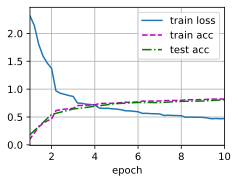

In [12]:
lr, num_epochs = 0.9, 10
device = "cuda" if torch.cuda.is_available() else "cpu"
train(net, train_iter, test_iter, num_epochs, lr, device)